## Importing the required libraries

In [1]:
##umporting Pandas and Numpy
import pandas as pd
import numpy as np



## different type of classfiers
from sklearn import tree # <- Decision- Trees
from sklearn import svm # <- Support Vector Machines
import sklearn.linear_model as linear_model # <- Logisitic Regression - Sigmoid Function on the Linear Regression
from sklearn.ensemble import RandomForestClassifier # <- Random Forest Classifier
from sklearn.neural_network import MLPClassifier # <- Neural Networks
from sklearn.naive_bayes import GaussianNB # <- Gaussian Naive-Bayes Classifier

## recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## splitting the data into training and test data
from sklearn.model_selection import train_test_split

## evaluating the different classifier models selected
import sklearn.metrics as metrics
from sklearn import preprocessing

## Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

## Step 2: Import the dataSET and load it into a pandas dataframe for further cleaning and Analysis

In [2]:
## data path 
df= pd.read_csv("h1b_kaggle.csv")

In [25]:
print(len(df))

3002458


In [4]:
pd.set_option('display.max_colwidth', -1)
pd.options.mode.chained_assignment = None

<ipython-input-4-f0d25484541f>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY OF TOMKINS PLC",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


# CREATE A NEW COLUMN  -COVIDHhotspot
## A 0 in Covid_hotspot means that the worksite is in a covid hotspot and entry is denied whereas a 1 indicates that visa access is granted since the worksite is not a covid 19 hotspot 

In [67]:
df['COVID-hotspot']=np.random.randint(0,2,df.shape[0])

In [70]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,COVID-hotspot
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,0
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,1
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,0
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY OF TOMKINS PLC",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,1
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,0


# Data Analysis and Preprocessing
## Case Status v/s Number of Petitions of the visa petition 

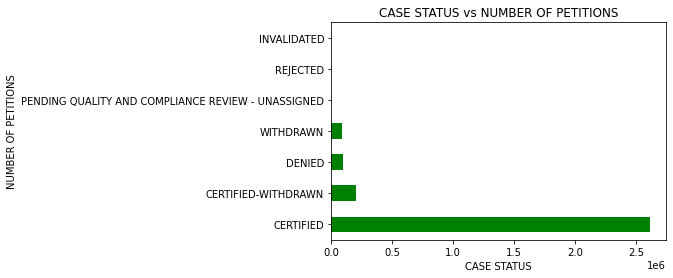

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                   202659 
DENIED                                                94346  
WITHDRAWN                                             89799  
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED    15     
REJECTED                                              2      
INVALIDATED                                           1      
Name: CASE_STATUS, dtype: int64


In [6]:
plot_status_numberinit = df['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'barh', color = 'green')
plot_status_numberinit.set_xlabel("CASE STATUS")
plot_status_numberinit.set_ylabel("NUMBER OF PETITIONS")
plt.show()
print(df['CASE_STATUS'].value_counts())

In [7]:
table_2 = df.loc[df['CASE_STATUS'].isin(["CERTIFIED", "DENIED", "REJECTED"])]

In [8]:
table_2['YEAR'] = table_2['YEAR'].astype(int)
table_2['EMPLOYER_NAME'] = table_2['EMPLOYER_NAME'].str.upper()
table_2['SOC_NAME'] = table_2['SOC_NAME'].str.upper()
table_2['JOB_TITLE'] = table_2['JOB_TITLE'].str.upper()
table_2['FULL_TIME_POSITION'] = table_2['FULL_TIME_POSITION'].str.upper()#datatype conversion for the year column

In [9]:
table_2.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
18,19,CERTIFIED,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,Y,187200.0,2016,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108
19,20,CERTIFIED,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",Y,241842.0,2016,"ALEXANDRIA, VIRGINIA",-77.046921,38.804836
22,23,CERTIFIED,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,Y,99986.0,2016,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738
23,24,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.0,2016,"CHULA VISTA, CALIFORNIA",-117.084196,32.640054
25,26,CERTIFIED,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,Y,187200.0,2016,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108


### Row Counts v/s Case Status of the visa petition 

<AxesSubplot:title={'center':'CASE STATUS vs NUMBER OF PETITIONS'}, xlabel='CASE STATUS', ylabel='NUMBER OF PETITIONS'>

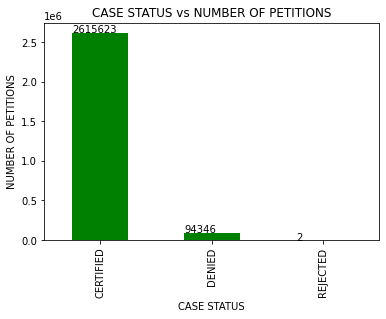

In [10]:
plot_status_number = table_2['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'green')
plot_status_number.set_xlabel("CASE STATUS")
plot_status_number.set_ylabel("NUMBER OF PETITIONS")
for p in plot_status_number.patches:
    plot_status_number.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plot_status_number

## The top 15 employers filing the H1-B visa petitions 

INFOSYS LIMITED                                    130241
TATA CONSULTANCY SERVICES LIMITED                  64358 
WIPRO LIMITED                                      43679 
DELOITTE CONSULTING LLP                            36667 
ACCENTURE LLP                                      32983 
IBM INDIA PRIVATE LIMITED                          28166 
MICROSOFT CORPORATION                              22373 
HCL AMERICA, INC.                                  22330 
ERNST & YOUNG U.S. LLP                             18217 
LARSEN & TOUBRO INFOTECH LIMITED                   16724 
CAPGEMINI AMERICA INC                              16032 
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION    15448 
GOOGLE INC.                                        12545 
IGATE TECHNOLOGIES INC.                            12196 
IBM CORPORATION                                    10690 
Name: EMPLOYER_NAME, dtype: int64


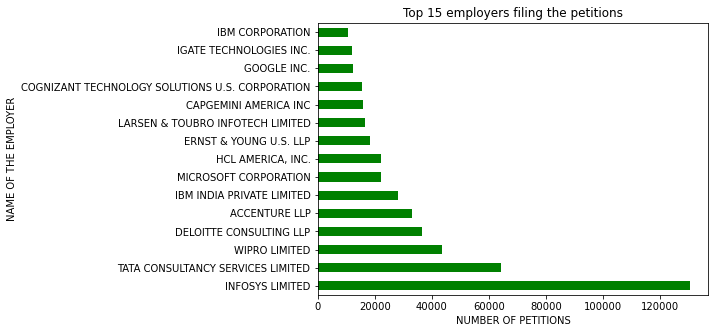

In [11]:
plot_status_topemp= table_2['EMPLOYER_NAME'].value_counts().head(15).plot.barh(title = "Top 15 employers filing the petitions", \
                                                                 color = 'green', figsize = (7, 5))
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER")
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS")
plot_status_topemp
print(table_2['EMPLOYER_NAME'].value_counts().head(15))

## The top 15 SOC names for which H1-B visas are raised 

COMPUTER SYSTEMS ANALYSTS                             469300
SOFTWARE DEVELOPERS, APPLICATIONS                     372125
COMPUTER PROGRAMMERS                                  360575
COMPUTER OCCUPATIONS, ALL OTHER                       164659
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                 75806 
MANAGEMENT ANALYSTS                                   62096 
ACCOUNTANTS AND AUDITORS                              49780 
FINANCIAL ANALYSTS                                    46730 
MECHANICAL ENGINEERS                                  39844 
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS           36219 
DATABASE ADMINISTRATORS                               35303 
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS    34433 
ELECTRONICS ENGINEERS, EXCEPT COMPUTER                31782 
PHYSICIANS AND SURGEONS, ALL OTHER                    30641 
OPERATIONS RESEARCH ANALYSTS                          30328 
Name: SOC_NAME, dtype: int64


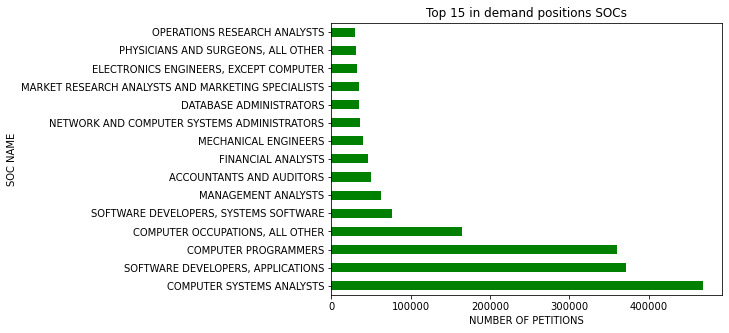

In [12]:
plot_status_topsoc= table_2['SOC_NAME'].value_counts().head(15).plot.barh(title = "Top 15 in demand positions SOCs", \
                                                                 color = 'green', figsize = (7, 5))
plot_status_topsoc.set_ylabel("SOC NAME")
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS")
plot_status_topsoc
print(table_2['SOC_NAME'].value_counts().head(15))

### Acceptance rate of the H1-B Visa petitions through different years 

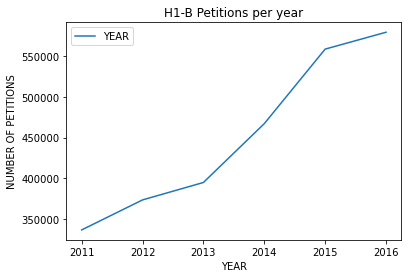

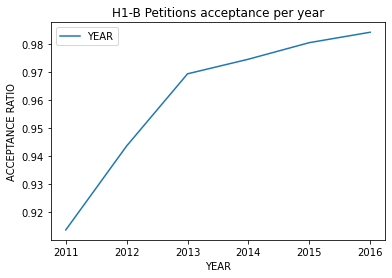

In [13]:
dfplot_status_fyear = pd.DataFrame(table_2['YEAR'].value_counts())
dfplot_status_fyear = dfplot_status_fyear.sort_values(['YEAR'])
plot_status_fyear = dfplot_status_fyear.plot(title = 'H1-B Petitions per year', kind = 'line')
plot_status_fyear.set_xlabel('YEAR')
plot_status_fyear.set_ylabel('NUMBER OF PETITIONS')
plt.show()

dfstatus_acceptance_peryear = pd.DataFrame(table_2[table_2['CASE_STATUS'] == 'CERTIFIED'].YEAR.value_counts() / table_2.YEAR.value_counts())
dfstatus_acceptance_peryear = dfstatus_acceptance_peryear.sort_values(['YEAR'])
status_acceptance_peryear = dfstatus_acceptance_peryear.plot(title = 'H1-B Petitions acceptance per year', kind = 'line')
status_acceptance_peryear.set_xlabel('YEAR')
status_acceptance_peryear.set_ylabel('ACCEPTANCE RATIO')
plt.show()

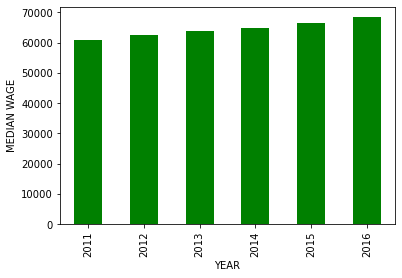

,PREVAILING_WAGE
,median
YEAR,
2011,60882.0
2012,62462.0
2013,63939.0
2014,64958.0
2015,66394.0
2016,68411.0


In [14]:
dfsalaries_trends_year = table_2.loc[:,['PREVAILING_WAGE', 'YEAR']].groupby(['YEAR']).agg(['median'])

plot_salaries_trends_year = dfsalaries_trends_year.plot(kind = 'bar', color = 'g', legend = None)
plot_salaries_trends_year.set_xlabel('YEAR')
plot_salaries_trends_year.set_ylabel('MEDIAN WAGE')
plt.show()
dfsalaries_trends_year

### Filter the rows and keep the ones with case status as 'CERTIFIED' or 'DECLINED

In [26]:
print(table_2['CASE_STATUS'].unique())
table_2 = table_2.loc[table_2['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])] #filtering

['CERTIFIED' 'DENIED']


### Remove rows with null values for EMPLOYER_NAME, SOC_NAME, JOB_TITLE, FULL_TIME_POSITION, PREVAILING_WAGE

In [27]:
table_2.isnull().sum(axis = 0)

Unnamed: 0            0    
CASE_STATUS           0    
EMPLOYER_NAME         18   
SOC_NAME              15893
JOB_TITLE             10   
FULL_TIME_POSITION    1    
PREVAILING_WAGE       53   
YEAR                  0    
WORKSITE              0    
lon                   97071
lat                   97071
dtype: int64

In [28]:
table_3 = table_2.dropna(axis=0, how='any', subset = ['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 
                                                      'FULL_TIME_POSITION', 'PREVAILING_WAGE'])

### Find the number of certified and denied of all the needed columns with their count

In [29]:
print(table_2.shape)
print(table_3.shape)

(2709969, 11)
(2694002, 11)


In [30]:
table_3.CASE_STATUS.value_counts()

CERTIFIED    2600241
DENIED       93761  
Name: CASE_STATUS, dtype: int64

### Downsampling the Data to match the ratio of certified and denied samples

In [31]:
table_temp_2_Dx = table_3[table_3['CASE_STATUS'] == 'DENIED']
#table_temp_2_Dx.duplicated(features_for_dup_removal).value_counts()

In [32]:
table_temp_2_Cx = table_3[table_3['CASE_STATUS'] == 'CERTIFIED']
#table_temp_2_Cx.duplicated(features_for_dup_removal).value_counts()

In [33]:
Input_Certified, Input_Certified_extra, y_certified, y_certified_extra = train_test_split(table_3[table_3.CASE_STATUS == 'CERTIFIED'],\
                                                                                          table_temp_2_Cx.CASE_STATUS, train_size= 0.06, random_state=1)

#Input_Certified is the needed x axis data
#Input_certified_extra is the eliminitated attributes data
#Same applied for the Y axis but as the values are "Certified" throughout, it doesn't matter

In [34]:
training_dataframe = Input_Certified.append(table_temp_2_Dx)

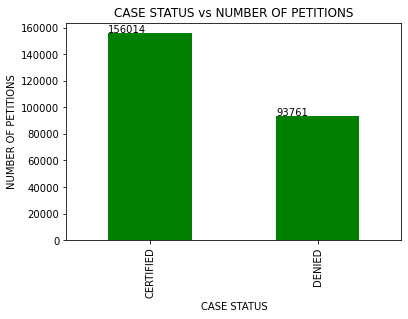

In [35]:
## plot the distribution of the certified and denied samples after downsampling
plot_after_ds = training_dataframe['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'green')
plot_after_ds.set_xlabel("CASE STATUS")
plot_after_ds.set_ylabel("NUMBER OF PETITIONS")
for p in plot_after_ds.patches:
    plot_after_ds.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()

# one hot encoding

In [36]:
# one-hot encoding for every possible and needed column
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_NAME.nunique())
print("Prevailing Wages ",training_dataframe.PREVAILING_WAGE.nunique())
print("Unique SOCs ", training_dataframe.SOC_NAME.nunique())
print("Unique Job Titles ",training_dataframe.JOB_TITLE.nunique())
print("Unique Filing Year ",training_dataframe.YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  80566
Prevailing Wages  24804
Unique SOCs  983
Unique Job Titles  53272
Unique Filing Year  6
Unique Worksite State  8637
Unique Employment Type  2


### Feature Categorisation Functions

In [37]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [38]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "NAR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [39]:
def state_extractor(work_site):
    return work_site.split(', ')[1]

In [40]:
training_dataframe['WORKSITE'] = training_dataframe['WORKSITE'].apply(state_extractor)

In [41]:
training_dataframe.WORKSITE.unique()

array(['PENNSYLVANIA', 'TEXAS', 'NEW YORK', 'CALIFORNIA', 'CONNECTICUT',
       'WASHINGTON', 'MISSOURI', 'OREGON', 'VIRGINIA', 'MASSACHUSETTS',
       'OHIO', 'ILLINOIS', 'FLORIDA', 'TENNESSEE', 'IDAHO', 'MARYLAND',
       'GEORGIA', 'NORTH CAROLINA', 'NEBRASKA', 'MINNESOTA', 'DELAWARE',
       'NEW HAMPSHIRE', 'ALABAMA', 'NEW JERSEY', 'WISCONSIN', 'ARIZONA',
       'INDIANA', 'MICHIGAN', 'IOWA', 'COLORADO', 'NEW MEXICO',
       'SOUTH CAROLINA', 'LOUISIANA', 'UTAH', 'KENTUCKY', 'ALASKA',
       'DISTRICT OF COLUMBIA', 'OKLAHOMA', 'ARKANSAS', 'RHODE ISLAND',
       'VERMONT', 'MAINE', 'MISSISSIPPI', 'NA', 'KANSAS', 'NEVADA',
       'HAWAII', 'WYOMING', 'PUERTO RICO', 'WEST VIRGINIA', 'MONTANA',
       'NORTH DAKOTA', 'SOUTH DAKOTA'], dtype=object)

In [42]:
training_dataframe['WAGE_CATEGORY'] = training_dataframe['PREVAILING_WAGE'].apply(wage_categorization)

In [43]:
training_dataframe_1 = training_dataframe.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
training_dataframe_1s = training_dataframe.loc[:,['SOC_NAME', 'CASE_STATUS']]
training_dataframe_1j = training_dataframe.loc[:,['JOB_TITLE', 'CASE_STATUS']]

In [44]:
training_dataframe_2_C = training_dataframe_1[training_dataframe_1.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
training_dataframe_2_Cs = training_dataframe_1s[training_dataframe_1s.CASE_STATUS == 'CERTIFIED'].SOC_NAME
training_dataframe_2_Cj = training_dataframe_1j[training_dataframe_1j.CASE_STATUS == 'CERTIFIED'].JOB_TITLE
positive_counts = training_dataframe_2_C.value_counts()
positive_counts_s = training_dataframe_2_Cs.value_counts()
positive_counts_j = training_dataframe_2_Cj.value_counts()

In [45]:
total_counts = training_dataframe_1.EMPLOYER_NAME.value_counts()
total_counts_s = training_dataframe_1s.SOC_NAME.value_counts()
total_counts_j = training_dataframe_1j.JOB_TITLE.value_counts()

In [46]:
final_ratio_series = positive_counts / total_counts

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
training_dataframe['EMPLOYER_ACCEPTANCE'] = training_dataframe.EMPLOYER_NAME.map(final_classification_employer)

In [47]:
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
training_dataframe['SOC_ACCEPTANCE'] = training_dataframe.SOC_NAME.map(final_classification_soc)

In [48]:
final_ratio_series_j = positive_counts_j / total_counts_j
final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
training_dataframe['JOB_ACCEPTANCE'] = training_dataframe.JOB_TITLE.map(final_classification_job)

In [49]:
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_ACCEPTANCE.nunique())
print("Wages Category", training_dataframe.WAGE_CATEGORY.nunique())
print("Unique SOCs ", training_dataframe.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",training_dataframe.JOB_ACCEPTANCE.nunique())
print("Unique Filing Year ",training_dataframe.YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  6
Wages Category 5
Unique SOCs  6
Unique Job Titles  6
Unique Filing Year  6
Unique Worksite State  53
Unique Employment Type  2


In [50]:
dict_cs = {"CERTIFIED" : 1, "DENIED": 0}
dict_fp = {"Y" : 1, "N" : 0}
try:
    
    training_dataframe['CASE_STATUS'] = training_dataframe['CASE_STATUS'].apply(lambda x: dict_cs[x])
    training_dataframe['FULL_TIME_POSITION'] = training_dataframe['FULL_TIME_POSITION'].apply(lambda x: dict_fp[x])
except:
    pass

In [51]:
training_dataframe['FILING_YEAR'] = training_dataframe['YEAR'].astype('int')
training_dataframe.sort_index(inplace = True)
training_dataframe = training_dataframe.loc[:, ['CASE_STATUS', 'FILING_YEAR',\
                                                'WORKSITE', 'WAGE_CATEGORY',  'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'FULL_TIME_POSITION']]
training_dataframe.head()

,CASE_STATUS,FILING_YEAR,WORKSITE,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,FULL_TIME_POSITION
39,0,2016,WASHINGTON,VERY HIGH,AR,LA,LA,1
47,0,2016,CALIFORNIA,VERY HIGH,AR,LA,LA,1
66,1,2016,GEORGIA,VERY HIGH,VHA,LA,LA,1
70,1,2016,PENNSYLVANIA,VERY HIGH,VHA,LA,LA,1
91,0,2016,MICHIGAN,HIGH,AR,VLA,LA,1


In [52]:
final_df_train = pd.get_dummies(training_dataframe, columns=['FILING_YEAR', 'WORKSITE', 'FULL_TIME_POSITION', 'WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE',
                                                             
                                                                'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
final_df_train.head()

,CASE_STATUS,FILING_YEAR_2012,FILING_YEAR_2013,FILING_YEAR_2014,FILING_YEAR_2015,FILING_YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
39,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
47,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
66,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
70,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
91,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


### Feature elimination using RFE

In [53]:
model = LogisticRegression()
rfe = RFE(model, 30)
fit = rfe.fit(final_df_train.iloc[:,1:], final_df_train.iloc[:,0])
support_rfe = rfe.support_
length_cols = list(final_df_train.iloc[:,1:].columns.values)
list_selected = []
for index in range(len(length_cols)):
    if support_rfe[index] == True:
        list_selected.append(length_cols[index])
    else:
        pass
print(list_selected)
print(rfe.ranking_)     # ref.ranking_ returns an array with positive integer values 
                         # to indicate the attribute ranking with a lower score indicating a higher ranking 

C:\Users\ujjwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\ujjwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ujjwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

C:\Users\ujjwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ujjwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ujjwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ujjwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

['FILING_YEAR_2012', 'FILING_YEAR_2013', 'FILING_YEAR_2014', 'FILING_YEAR_2015', 'FILING_YEAR_2016', 'WORKSITE_ALASKA', 'WORKSITE_DISTRICT OF COLUMBIA', 'WORKSITE_KANSAS', 'WORKSITE_KENTUCKY', 'WORKSITE_MAINE', 'WORKSITE_MISSISSIPPI', 'WORKSITE_NA', 'WORKSITE_NORTH DAKOTA', 'WORKSITE_OKLAHOMA', 'WORKSITE_SOUTH DAKOTA', 'FULL_TIME_POSITION_1', 'WAGE_CATEGORY_VERY HIGH', 'EMPLOYER_ACCEPTANCE_HA', 'EMPLOYER_ACCEPTANCE_LA', 'EMPLOYER_ACCEPTANCE_MA', 'EMPLOYER_ACCEPTANCE_VHA', 'EMPLOYER_ACCEPTANCE_VLA', 'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA', 'JOB_ACCEPTANCE_MA', 'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA', 'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA', 'SOC_ACCEPTANCE_VLA']
[ 1  1  1  1  1  1 23 14 33 11 38 25  1  9 18 15 37 22 48  6  1  1 29  1
 45 41 46 28  1 40 35  1  7 20  5 27  3 24 19  1 30  1 10 36 31 21  4  1
 26 43 47 42 44 17 13  8 34  1 16 39  1 12  1  1  1  1  1  1  1  1  1  1
  2  1  1 32  1]


In [54]:
unique_listcols = [col.split('_')[0] for col in list_selected]
set(unique_listcols)

{'EMPLOYER', 'FILING', 'FULL', 'JOB', 'SOC', 'WAGE', 'WORKSITE'}

### Splitting into training and test data

In [55]:
X_train, X_test, y_train, y_test = train_test_split(final_df_train.iloc[:,1:], final_df_train.iloc[:, 0], test_size = 0.20, random_state=1)
#y_train[y_train==1].shape
y_test[y_test==1].shape

(31200,)

In [56]:
X_train.head()

,FILING_YEAR_2012,FILING_YEAR_2013,FILING_YEAR_2014,FILING_YEAR_2015,FILING_YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,WORKSITE_COLORADO,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
363034,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2794144,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2298633,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
256430,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2924319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


# Training Classifiers

## Decision Tree Model


In [57]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)   

In [58]:
y_pred = dtree.predict(X_test)

y_prob = dtree.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))


test 1069287    1
608355     0
873557     1
2063899    0
879488     1
2280957    1
564762     0
2784493    1
2531141    1
718033     0
Name: CASE_STATUS, dtype: int64
pred [1 0 1 0 1 1 0 1 1 1]

[[14833  3922]
 [ 2223 28977]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     18755
           1       0.88      0.93      0.90     31200

    accuracy                           0.88     49955
   macro avg       0.88      0.86      0.87     49955
weighted avg       0.88      0.88      0.88     49955



# Logistic Regression Model

In [59]:
lr_clf = linear_model.LogisticRegression()
lr_clf.fit(X_train, y_train)  

C:\Users\ujjwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred_lr = lr_clf.predict(X_test)

probs = lr_clf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_lr[:10])

print(metrics.confusion_matrix(y_test,y_pred_lr))
print(metrics.classification_report(y_test, y_pred_lr))
)

test 1069287    1
608355     0
873557     1
2063899    0
879488     1
2280957    1
564762     0
2784493    1
2531141    1
718033     0
Name: CASE_STATUS, dtype: int64
pred [1 0 1 0 1 1 0 1 1 1]
[[14545  4210]
 [ 1238 29962]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     18755
           1       0.88      0.96      0.92     31200

    accuracy                           0.89     49955
   macro avg       0.90      0.87      0.88     49955
weighted avg       0.89      0.89      0.89     49955



# Random Forest Classifier

In [61]:
rf = RandomForestClassifier(n_estimators = 75, random_state = 50)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75, random_state=50)

In [62]:
y_pred_rf =  rf.predict(X_test)
probs = rf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print(metrics.confusion_matrix(y_test,y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))


test 1069287    1
608355     0
873557     1
2063899    0
879488     1
2280957    1
564762     0
2784493    1
2531141    1
718033     0
Name: CASE_STATUS, dtype: int64
pred [1 0 1 0 1 1 0 1 1 1]
[[14722  4033]
 [ 1907 29293]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     18755
           1       0.88      0.94      0.91     31200

    accuracy                           0.88     49955
   macro avg       0.88      0.86      0.87     49955
weighted avg       0.88      0.88      0.88     49955



## Artificial Neural Networks

In [63]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=1000)

In [64]:
y_pred_mlp = mlp.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_mlp)
print(confusion)
print(metrics.classification_report(y_test, y_pred_mlp))
d

[[14562  4193]
 [ 1272 29928]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     18755
           1       0.88      0.96      0.92     31200

    accuracy                           0.89     49955
   macro avg       0.90      0.87      0.88     49955
weighted avg       0.89      0.89      0.89     49955



 # Gaussian Naive Bayes Classifier

In [65]:
gaus_clf = GaussianNB()
gaus_clf.fit(X_train, y_train)

GaussianNB()

In [66]:
y_pred_glb = gaus_clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_glb)
print(confusion)
print(metrics.classification_report(y_test, y_pred_glb))

[[ 7777 10978]
 [ 2608 28592]]
              precision    recall  f1-score   support

           0       0.75      0.41      0.53     18755
           1       0.72      0.92      0.81     31200

    accuracy                           0.73     49955
   macro avg       0.74      0.67      0.67     49955
weighted avg       0.73      0.73      0.71     49955

